In [2]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
df = pd.read_csv('./Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

df['y'] = df['Primary_Type']
df['ds'] = df['Date']
df = df.head(1000)
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary_Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,y,ds
0,3,10508693,HZ250496,5/3/16 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,08B,1154907.0,1893681.0,2016,5/10/16 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)",BATTERY,5/3/16 23:40
1,89,10508695,HZ250409,5/3/16 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,08B,1183066.0,1864330.0,2016,5/10/16 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)",BATTERY,5/3/16 21:40
2,197,10508697,HZ250503,5/3/16 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,24,1140789.0,1904819.0,2016,5/10/16 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)",PUBLIC PEACE VIOLATION,5/3/16 23:31
3,673,10508698,HZ250424,5/3/16 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,...,08B,1143223.0,1901475.0,2016,5/10/16 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)",BATTERY,5/3/16 22:10
4,911,10508699,HZ250455,5/3/16 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,...,6,1139890.0,1901675.0,2016,5/10/16 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)",THEFT,5/3/16 22:00


In [4]:
m = Prophet()
m.fit(df)

ValueError: Unable to parse string "BATTERY" at position 0

In [44]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1025,2016-05-31 02:50:00
1026,2016-06-01 02:50:00
1027,2016-06-02 02:50:00
1028,2016-06-03 02:50:00
1029,2016-06-04 02:50:00


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1025,2016-05-31 02:50:00,41.806936,41.699593,41.905686
1026,2016-06-01 02:50:00,41.789411,41.682473,41.893513
1027,2016-06-02 02:50:00,41.791022,41.680661,41.900592
1028,2016-06-03 02:50:00,41.805609,41.695838,41.919432
1029,2016-06-04 02:50:00,41.775090,41.672294,41.880149


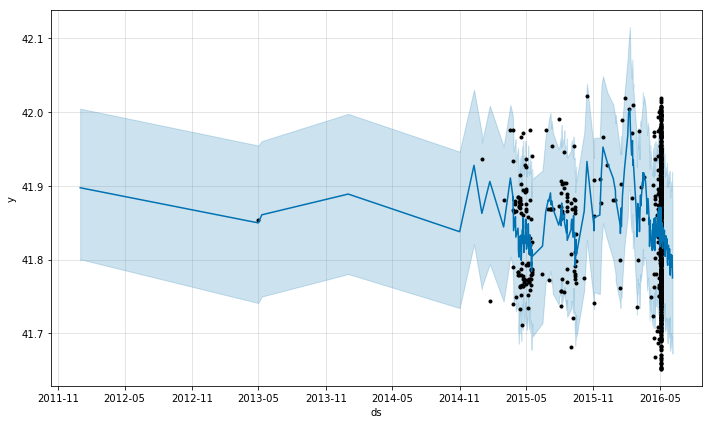

In [46]:
m.plot(forecast)

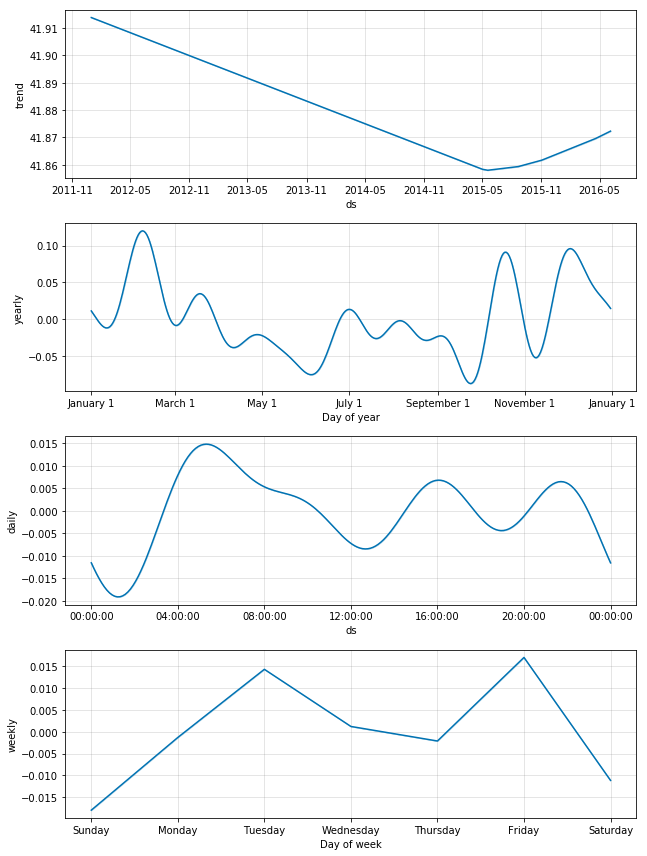

In [47]:
m.plot_components(forecast)